<a href="https://colab.research.google.com/github/dil150898/Hotel_booking_anylisys/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# installing Klib library
!pip install klib

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import folium
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
file_path = ("/content/drive/MyDrive/Almabetter/Capstone Project/Exploratory Data Analysis/Hotel Booking Analysis/Dil khush Sharma/1 Hotel Bookings.csv")
df = pd.read_csv(file_path)

In [5]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.shape

(119390, 32)

In [10]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [11]:
df.isna().sum().sort_values(ascending = False)[:4]

company     112593
agent        16340
country        488
children         4
dtype: int64

In [12]:
df['country'].fillna('others' , inplace = True)
df['children'].fillna(0 , inplace = True)
df['agent'].fillna(0 , inplace = True)
df['company'].fillna(0 , inplace = True)

In [13]:
hotel_type = df["hotel"].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [14]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [15]:
df['agent'].value_counts()

9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 334, dtype: int64

In [16]:
df['company'].value_counts()

0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

In [17]:
"""percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)
print(f'The percentage of data having availability as 0 is {percentage_of_data_having_availbility_0} %')"""

"percentage_of_data_having_availbility_0= round((len(df[df['availability_365']==0]['availability_365'])/len(df['availability_365']))*100,2)\nprint(f'The percentage of data having availability as 0 is {percentage_of_data_having_availbility_0} %')"

In [18]:
df.isna().sum().sort_values(ascending = False)[:4]

hotel                        0
is_canceled                  0
reservation_status           0
total_of_special_requests    0
dtype: int64

In [19]:
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.shape

(87396, 32)

In [22]:
df['total_people'] = df['adults'] + df['children'] + df['babies']

In [23]:
df['total_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

## 1. Most prefered hotel

*   List item
*   List item



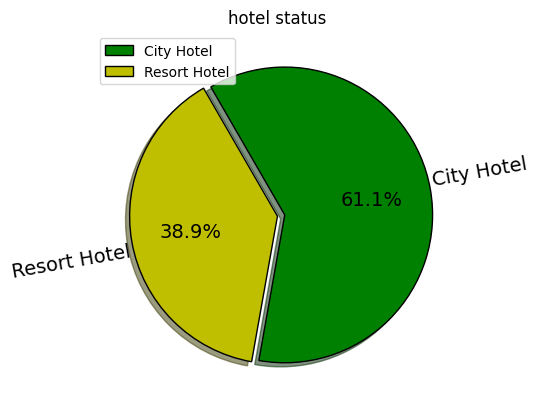

In [24]:
hotel_count = df.hotel.value_counts().sort_values(ascending=False).reset_index()
hotel_count.rename(columns = {'index' : 'Hotel_type' , 'hotel' : 'Hotel_counts'} , inplace = True)
explode = (0.05,0.0)
plt.pie(hotel_count["Hotel_counts"] , labels = hotel_count['Hotel_type'] , explode = explode , colors = ['g' , 'y'] ,
        autopct = '%0.1f%%' , radius = 1 , labeldistance = 1 , startangle = 120 ,
        textprops = {'fontsize' : 14} , counterclock = False , wedgeprops = {'linewidth' : 1 , 'edgecolor' : 'k'} , center = (0,0) ,
        rotatelabels = True , shadow = True)
plt.title ("hotel status")
plt.legend(loc = 2)
plt.show()

In [25]:
df['is_canceled'].nunique()

2

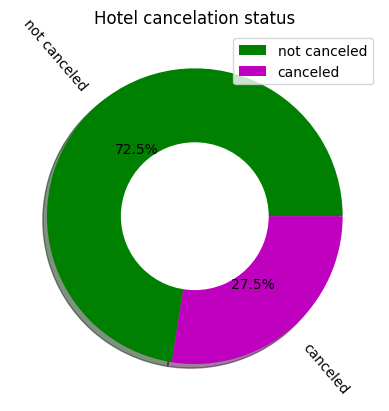

In [26]:
df['is_canceled'] = df['is_canceled'].replace([0 , 1] , ['not canceled' , 'canceled'])
cancelation_status = df.is_canceled.value_counts().reset_index()
cancelation_status.rename(columns = {'index' : 'status' , 'is_canceled' : 'is_canceled'} , inplace = True)
plt.pie(cancelation_status['is_canceled'] , labels = cancelation_status['status'] , shadow = True  , colors = ['g' , 'm'] ,rotatelabels = True , radius = 1 , autopct = '%0.1f%%' )
plt.pie([1] , colors = "w" , radius = 0.5)
plt.title('Hotel cancelation status')
plt.legend(loc = 1)
plt.show()

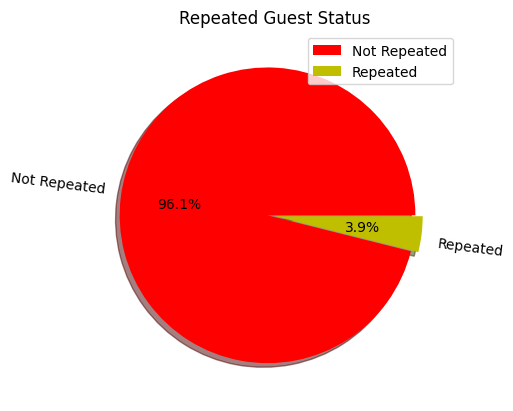

In [27]:
df['is_repeated_guest'] = df['is_repeated_guest'].replace([0 , 1] , ['Not Repeated' , 'Repeated'])
guest_status = df.is_repeated_guest.value_counts().reset_index()
guest_status.rename(columns = {"index" : "status" , "is_repeated_guest" : "count"} , inplace = True)
plt.pie(guest_status["count"] ,explode = explode , labels = guest_status['status'] , colors = ['r' , 'y'] , shadow = True , rotatelabels = True , autopct = '%0.1f%%')
plt.title('Repeated Guest Status')
plt.legend(loc = 1)
plt.show()

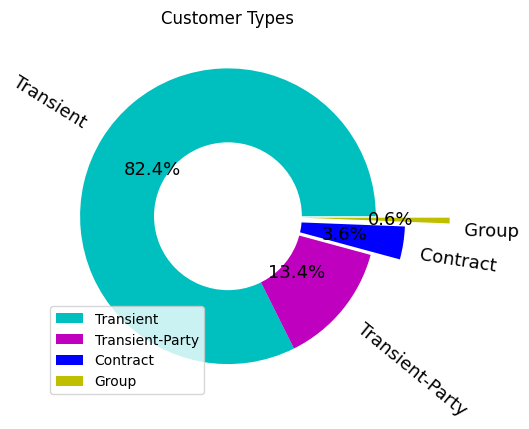

In [28]:
Customer_types = df.customer_type.value_counts().reset_index()
Customer_types.rename(columns = {"index" : "type" , "customer_type" : "total_count"} , inplace = True)
exp = (0.0 , 0.0 , 0.2 , 0.5)
plt.pie(Customer_types['total_count'] , labels = Customer_types['type'] , colors = ['c' , 'm' , 'b' , 'y'] , explode = exp , rotatelabels = True , autopct = "%0.1f%%" , textprops = {'fontsize' : 13} )
plt.title("Customer Types" )
plt.pie([1] , colors = 'w' , radius = 0.5)
plt.legend(loc = 3)
plt.show()

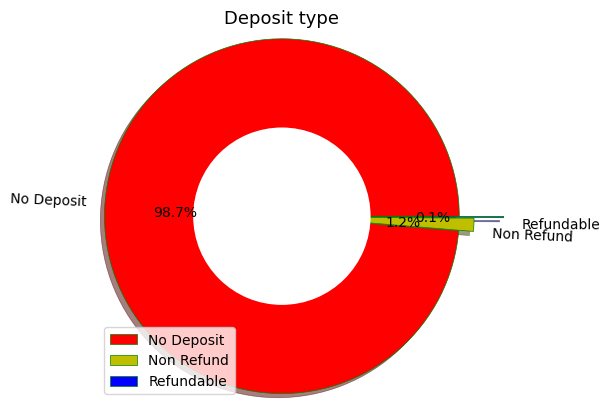

In [29]:
deposit_type = df.deposit_type.value_counts().reset_index()
deposit_type.rename(columns = {"index" : "Deposit Type" , "deposit_type" : "count"} , inplace = True)
exp = (0.0 , 0.1 , 0.3)
plt.pie(deposit_type["count"] , labels = deposit_type["Deposit Type"] , shadow = True , wedgeprops = {'linewidth' : 0.5 , 'edgecolor' : 'g'} , colors = ['r' , 'y' , 'b'] , autopct = '%0.1f%%' , rotatelabels = True , radius = 1.2 ,explode = exp)
plt.pie([1] , colors = 'w' , radius = 0.6)
plt.title('Deposit type' , fontsize=13)
plt.legend(loc = 3)
plt.show()


## 2. Lets practice bar graph

In [30]:
deposit_type = df.deposit_type.value_counts().reset_index()
deposit_type.rename(columns = {"index" : "Deposit Type" , "deposit_type" : "count"} , inplace = True)


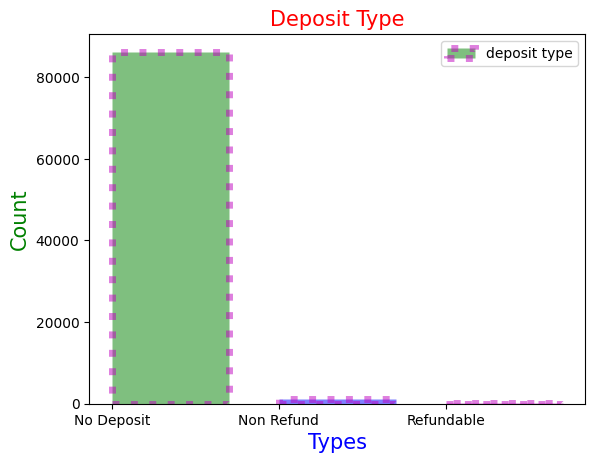

In [31]:
plt.title('Deposit Type' , fontsize = 15 , color = 'r')
plt.xlabel("Types" , fontsize = 15 , color = 'b')
plt.ylabel('Count' , fontsize = 15 , color = 'g')
plt.bar(deposit_type["Deposit Type"] , deposit_type["count"] , width = 0.7 , color = ['g' , 'b' , 'm'] , align = 'edge' , edgecolor = 'm' , linewidth = 5 , linestyle = ':' , alpha = 0.5 , label = 'deposit type')
plt.legend()
plt.show()

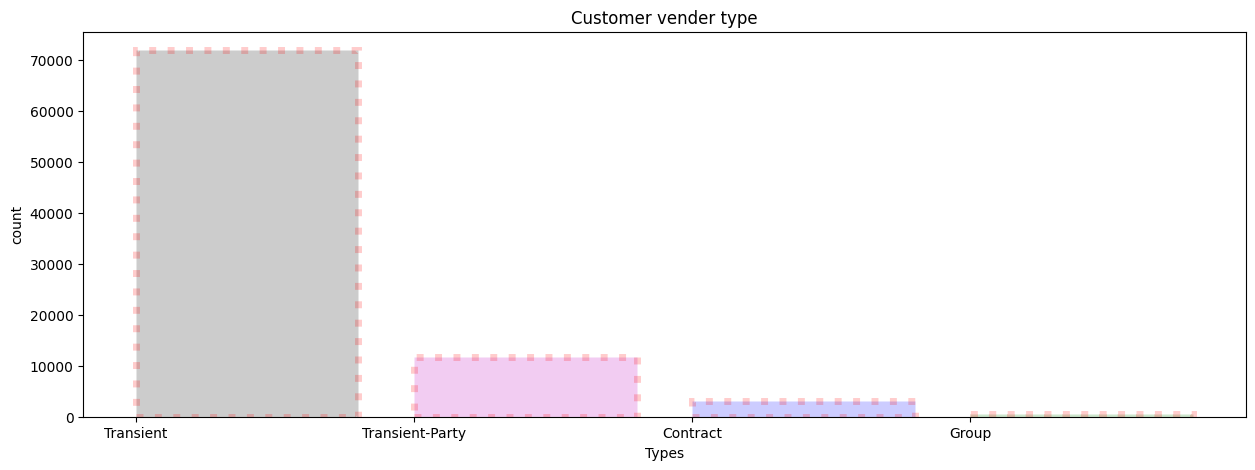

In [32]:
Customer_types = df.customer_type.value_counts().reset_index()
Customer_types.rename(columns = {"index" : "type" , "customer_type" : "total_count"} , inplace = True)
color = ['k' , 'm' , 'b' , 'g']
fig = plt.figure(figsize =(15, 5))
plt.bar(Customer_types['type'] , Customer_types['total_count'] , color = color , align = 'edge' , edgecolor = 'r' , linewidth = 5 , linestyle = ':' , alpha = 0.2 , label = 'customer')
plt.legend =()
plt.xlabel('Types')
plt.ylabel('count')
plt.title('Customer vender type')
plt.show()

In [33]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [34]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stays
0,Resort Hotel,not canceled,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,not canceled,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,not canceled,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,not canceled,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,not canceled,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [35]:
dt = df.deposit_type.value_counts().reset_index()
dt

,index,deposit_type
0,No Deposit,86251
1,Non Refund,1038
2,Refundable,107


In [36]:

rs = df.reservation_status.value_counts().reset_index()
rs


,index,reservation_status
0,Check-Out,63371
1,Canceled,23011
2,No-Show,1014


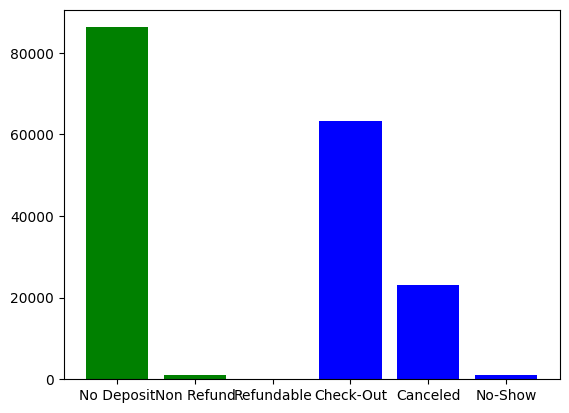

In [37]:
plt.bar(dt['index'] , dt['deposit_type'] , color = 'g')
plt.bar(rs['index'] , rs['reservation_status'] , color = 'b')
plt.show()

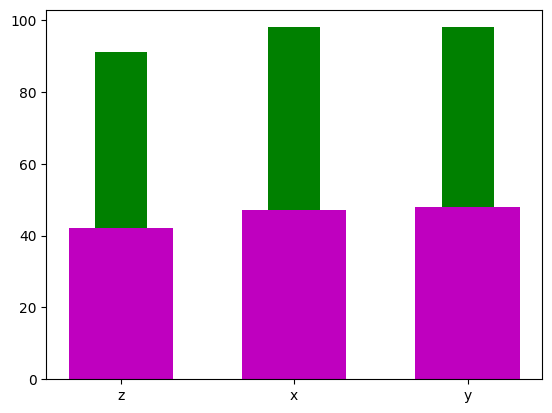

In [52]:
x = np.random.randint(10,49,50)
y = np.random.randint(50,99,50)
z = ['z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','z','x','y','y','z']
X = list(x)
Y = list(y)
plt.bar(z,Y , color = 'g' , width = 0.3 , label = 'xcvdfg')
plt.bar(z,X, color = 'm' ,width = 0.6 , label = 'xcvsdfg')

plt.show()

TypeError: ignored

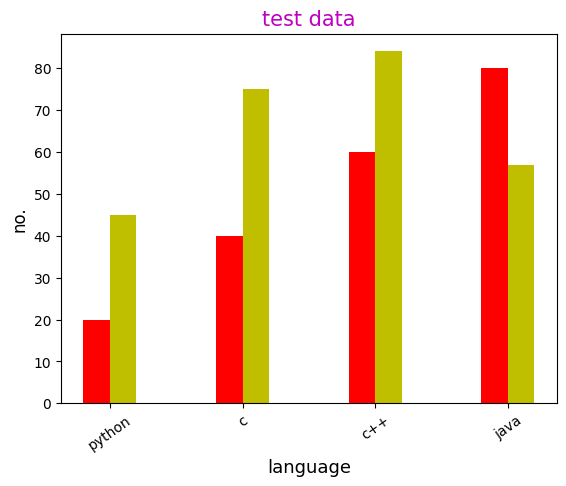

In [56]:
x = ['python' , 'c' , 'c++' , 'java']
y = [20,40,60,80]
z = [45,75,84,57]
width = 0.2
p = np.arange(len(x))
p1 = [j+width for j in p]

plt.xlabel('language' , fontsize = 13)
plt.ylabel('no.' , fontsize = 12)
plt.title("test data" , fontsize = 15 , color = 'm')

plt.bar(p , y, width , color = 'r' , label = 'popularity')
plt.bar(p1 , z , width , color = 'y' , label = 'popularity 1')
#plt.xticks(p+width / 2 , x) this can also result same
plt.xticks(p+0.1, x , rotation = 35)
#codes are currect notebook have some gliches that's why showing error
plt.legend()

plt.show()

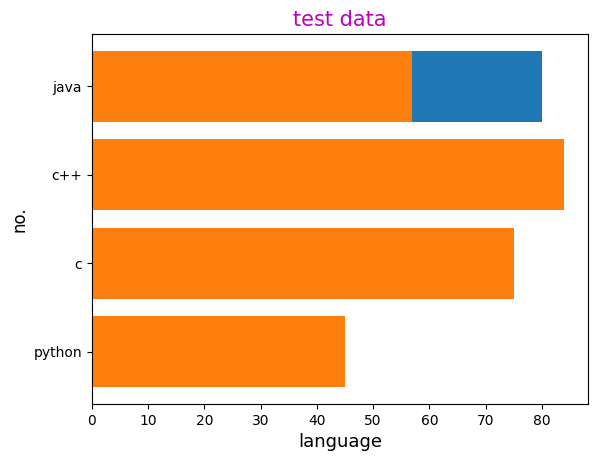

In [55]:
x = ['python' , 'c' , 'c++' , 'java']
y = [20,40,60,80]
z = [45,75,84,57]


plt.xlabel('language' , fontsize = 13)
plt.ylabel('no.' , fontsize = 12)
plt.title("test data" , fontsize = 15 , color = 'm')

plt.barh(x,y)
plt.barh(x,z)

plt.show()

##lets practice scatter plot

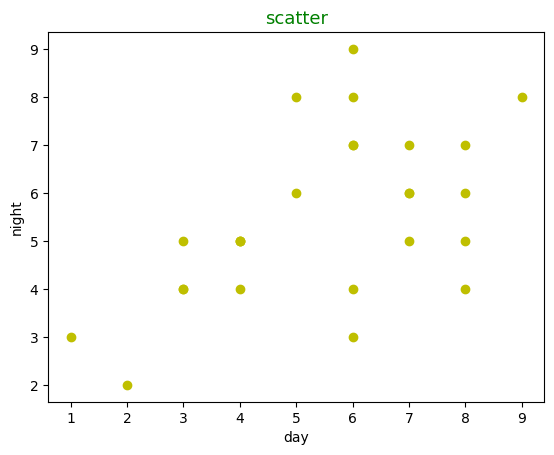

In [66]:
x = [1,2,3,4,5,6,7,8,9,8,7,6,5,6,7,8,6,4,3,4,6,7,8,6,4,3]
y = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]

plt.scatter(x,y , color = "y")
plt.title('scatter' , fontsize = 13 , color = 'g')
plt.xlabel('day')
plt.ylabel('night')
plt.show()

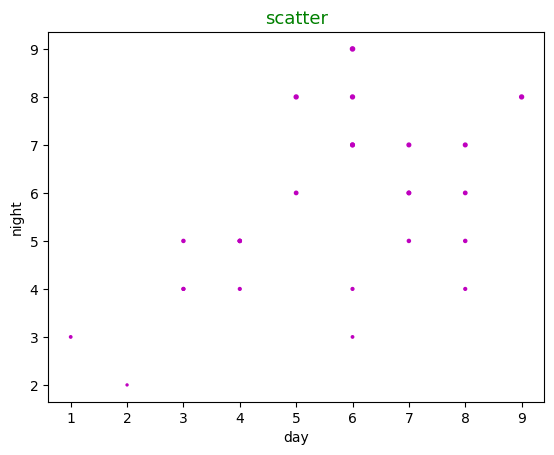

In [74]:
x = [1,2,3,4,5,6,7,8,9,8,7,6,5,6,7,8,6,4,3,4,6,7,8,6,4,3]
y = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
plt.scatter(x,y , c = 'm' , s = sizes)
sizes = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
plt.title('scatter' , fontsize = 13 , color = 'g')
plt.xlabel('day')
plt.ylabel('night')
plt.show()

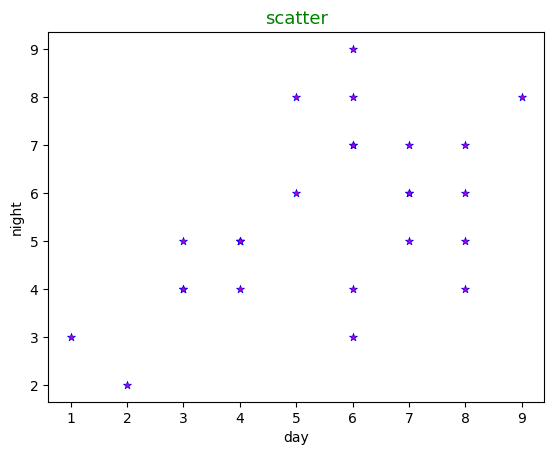

In [81]:
x = [1,2,3,4,5,6,7,8,9,8,7,6,5,6,7,8,6,4,3,4,6,7,8,6,4,3]
y = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
plt.scatter(x,y , c = 'm' , alpha = 1 , marker = '*' , edgecolor = 'b' , linewidth = 0.5)
sizes = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
plt.title('scatter' , fontsize = 13 , color = 'g')
plt.xlabel('day')
plt.ylabel('night')
plt.show()

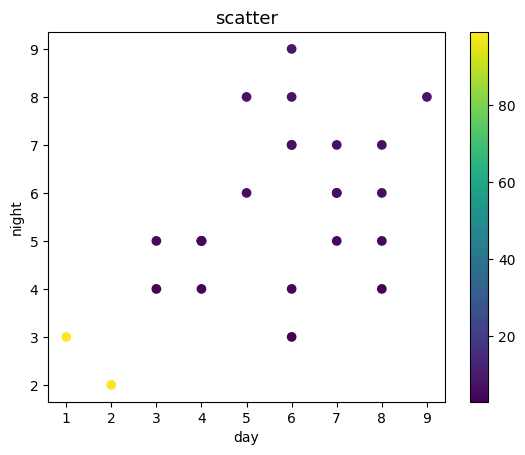

In [87]:
x = [1,2,3,4,5,6,7,8,9,8,7,6,5,6,7,8,6,4,3,4,6,7,8,6,4,3]
y = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
#color = [99,98,97,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
plt.scatter(x,y ,c = color , cmap = 'viridis')
plt.colorbar()
plt.title('scatter' , fontsize = 13 )
plt.xlabel('day')
plt.ylabel('night')
plt.show()

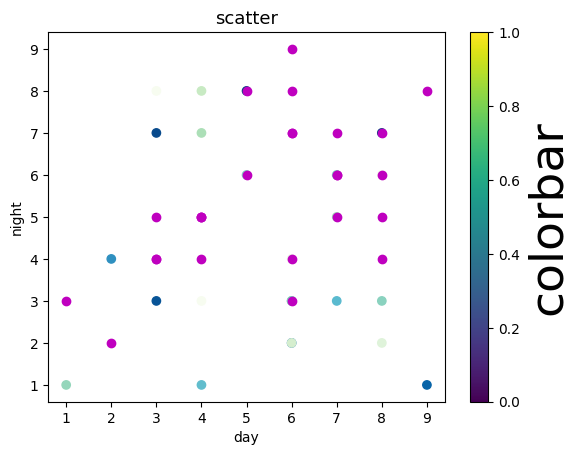

In [96]:
x = [1,2,3,4,5,6,7,8,9,8,7,6,5,6,7,8,6,4,3,4,6,7,8,6,4,3]
y = [3,2,4,5,6,7,6,5,8,6,7,9,8,7,6,7,8,5,4,5,4,5,4,3,4,5]
z = np.random.randint(1,10,26)
scolor = np.random.randint(10,85,26)
plt.scatter(x,z , c= scolor , cmap = 'GnBu')

plt.scatter(x,y , c= 'm')
t = plt.colorbar()
t.set_label("colorbar" , fontsize = 34)
plt.title('scatter' , fontsize = 13 )
plt.xlabel('day')
plt.ylabel('night')
plt.show()

## Histogram plot

In [100]:
import numpy as np
import random

In [102]:
x =[ 61, 116, 144, 470, 399, 153, 158, 139, 485, 285, 275, 413, 329,
       154,  56, 489,  15, 488, 219, 244, 313,  88, 275, 467, 491, 371,
       332,  40, 108,  49, 451,  91, 498, 248,  10, 303, 403, 340, 120,
        51, 132, 197, 415, 264, 294, 437, 496, 395, 481,  88, 327, 316,
        23, 301, 472, 208, 105, 395, 219, 172, 187, 295, 453, 282, 247,
       239, 307, 452, 237, 412, 107,  24,  42, 160, 250, 300, 386, 116,
       231, 182, 180, 357, 179, 348, 265, 321,  12, 480, 455, 334, 286,
       470, 315, 343, 333,  60, 208, 118, 200, 388, 216, 220, 285, 398,
       461, 264, 405, 432, 342, 474,  39,  40, 132, 262, 209, 209,  20,
       286, 179, 294, 371, 293, 305, 198, 388, 196,  35, 111, 228,  17,
       412, 268, 274, 276,  69, 248, 101, 219, 477,  20, 345, 288, 157,
        65, 138,  80, 241, 141, 358,  54, 158, 337,  64, 385, 251, 380,
       346,  99, 361, 166,  86, 466,  18, 192, 231, 415,  94, 250, 302,
       308,  52,  95,  44,  79, 328, 279,  22, 110, 340, 316, 161, 326,
       194, 196, 118,  96, 107, 410, 151, 283, 236, 414, 301, 341,  25,
       217, 164,  12,  75,  90, 110, 397,  58, 289, 198, 304, 214, 109,
       237,  35, 494,  93, 440,  24, 125,  21, 250, 252, 490, 317, 151,
       337, 435, 128, 405, 131, 473, 266, 358, 200,  94, 320,  11, 479,
       233, 259, 341, 245, 454, 381, 121, 138,  54, 439, 453,  46, 308,
       100, 235,  92, 462, 446, 401, 386, 442,  51, 237, 427, 161, 303,
       306,  38, 451,  32, 291, 122, 299, 463, 382,  19,  96, 425, 464,
       352, 128, 306, 301,  28,  83, 227, 360,  91, 292, 360,  78, 464,
        66,  35, 112, 436, 149, 335, 452, 294, 408, 331, 143, 493, 265,
       196,  44, 298, 325, 211,  74, 252, 376, 481, 405, 463,  39, 343,
       474, 442, 329, 179,  76,  22, 414, 134, 103, 379,  55, 498, 166,
       229, 124, 390,  56, 481, 111, 143, 385, 308, 127,  65, 442, 385,
       499, 160, 376,  72, 136, 110, 316,  65,  25, 443, 234, 457, 297,
        63, 324, 178, 368, 132, 362, 165, 482, 277,  90, 332, 113, 283,
       176, 490,  63, 180, 318, 295, 429, 378,  76, 273, 262, 300,  22,
        20, 380,  20,  32, 493, 188,  43, 461, 134, 385, 232, 344, 197,
       488,  46,  56, 309, 327, 282, 399, 177, 451, 486]


In [106]:
y = [464, 932, 819, 229, 461, 900, 323, 104, 138, 990, 454, 926, 189,
       401, 706, 759, 329, 963, 661, 259, 497, 387, 762, 166, 156, 642,
       339, 841, 219, 162, 685, 221, 810, 329, 792, 696, 134, 102, 416,
       552, 117, 106, 973, 743, 330, 842, 159, 394, 259, 811, 848, 506,
       698, 438, 529, 525, 841, 161, 762, 238, 590, 162, 663, 911, 875,
       596, 830, 716, 482, 994, 366, 190, 315, 408, 161, 895, 297, 894,
       528, 674, 240, 683, 286, 819, 302, 102, 908, 234, 856, 548, 561,
       404, 831, 798, 378, 436, 156, 474, 472, 662, 592, 708, 250, 901,
       472, 247, 562, 491, 904, 831, 120, 647, 502, 263, 374, 412, 440,
       847, 809, 231, 540, 729, 255, 235, 719, 825, 208, 534, 723, 704,
       483, 851, 665, 793, 937, 323, 180, 628, 553, 130, 149, 215, 652,
       861, 669, 807, 654, 799, 709, 357, 337, 676, 287, 154, 498, 754,
       578, 969, 809, 791, 153, 403, 361, 495, 243, 429, 658, 143, 337,
       811, 187, 358, 430, 234, 523, 472, 486, 229, 368, 813, 558, 427,
       879, 689, 790, 602, 863, 315, 535, 598, 651, 376, 724, 751, 181,
       732, 634, 267, 484, 547, 131, 650, 592, 590, 217, 838, 462, 117,
       694, 771, 302, 443, 898, 774, 716, 688, 123, 994, 513, 709, 482,
       414, 336, 930, 410, 237, 304, 945, 328, 940, 482, 346, 899, 329,
       271, 583, 750, 205, 178, 523, 865, 864, 130, 755, 820, 486, 661,
       510, 840, 741, 732, 806, 519, 158, 496, 298, 761, 907, 916, 215,
       483, 324, 279, 962, 160, 271, 614, 910, 977, 941, 699, 193, 444,
       988, 453, 885, 637, 820, 977, 861, 133, 961, 231, 452, 545, 935,
       996, 349, 888, 846, 271, 697, 866, 340, 286, 128, 297, 560, 583,
       120, 988, 891, 478, 721, 548, 479, 720, 493, 906, 905, 184, 573,
       284, 262, 255, 360, 385, 392, 841, 750, 691, 109, 175, 169, 899,
       806, 768, 212, 792, 790, 703, 721, 559, 729, 776, 441, 254, 389,
       651, 542, 973, 751, 949, 941, 946, 363, 559, 840, 821, 554, 475,
       978, 675, 974, 780, 281, 491, 337, 498, 421, 915, 458, 963, 990,
       548, 295, 957, 152, 972, 565, 549, 849, 830, 699, 244, 209, 462,
       849, 115, 823, 439, 591, 358, 230, 415, 260, 418, 980, 766, 725,
       207, 538, 748, 377, 957, 712, 805, 254, 606, 839]

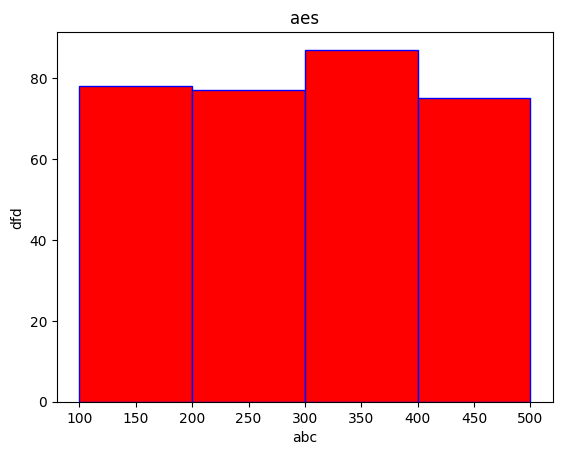

In [113]:
plt.hist(x , color = 'r' , edgecolor = 'b' , bins = z)
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

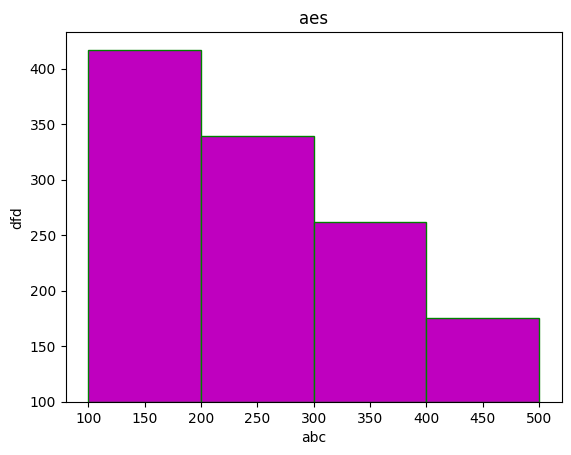

In [118]:
plt.hist(x , color = 'm' , edgecolor = 'g' , bins = z , cumulative = -1 , bottom = 100)
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

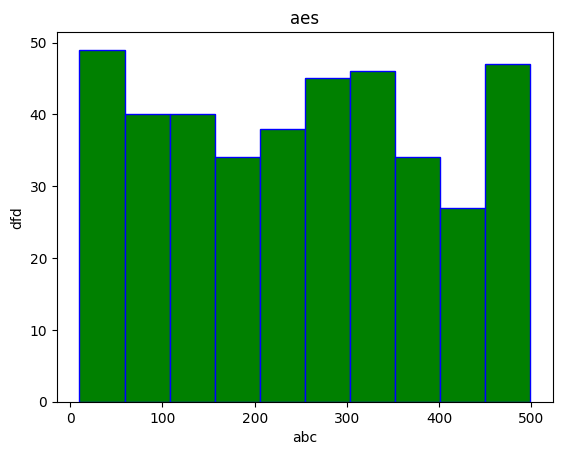

In [122]:
plt.hist(x , color = 'g' , edgecolor = 'b' , align = 'mid')
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

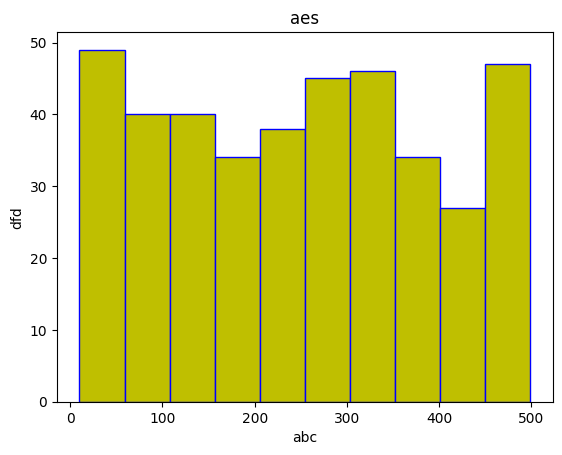

In [123]:
plt.hist(x , color = 'y' , edgecolor = 'b' , histtype = 'barstacked')
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

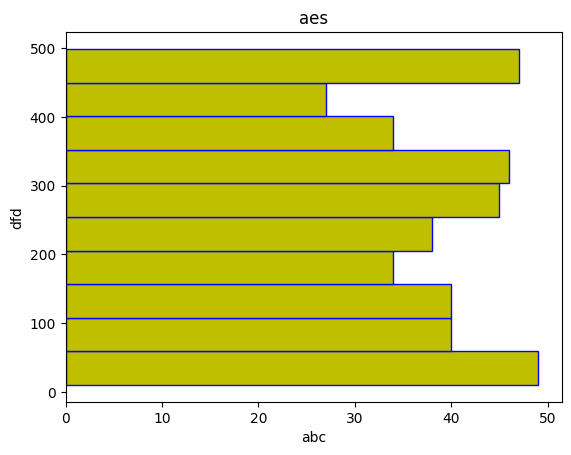

In [124]:
plt.hist(x , color = 'y' , edgecolor = 'b' , orientation = 'horizontal')
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

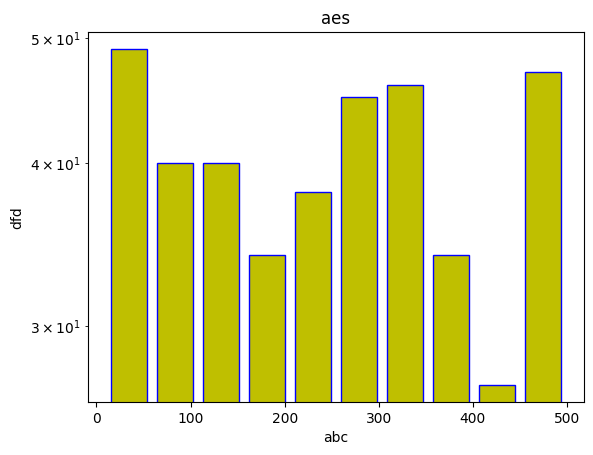

In [126]:
plt.hist(x , color = 'y' , edgecolor = 'b' , rwidth = 0.8 , log = True)
z = [100,200,300,400,500]

plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.show()

TypeError: ignored

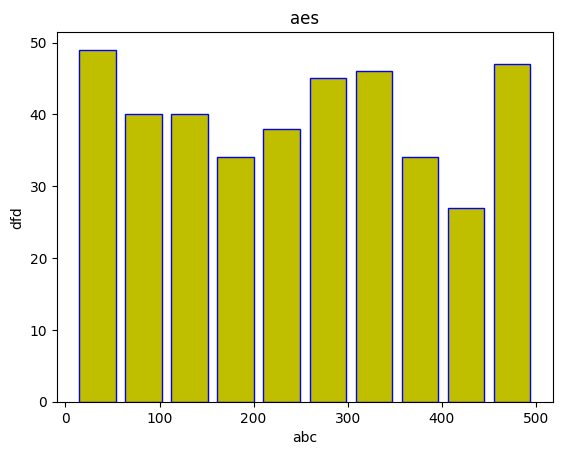

In [129]:
plt.hist(x , color = 'y' , edgecolor = 'b' , rwidth = 0.8 , label = 'xyz')

#same here also heppining glich in legend function
z = [100,200,300,400,500]
plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
plt.legend()
plt.show()

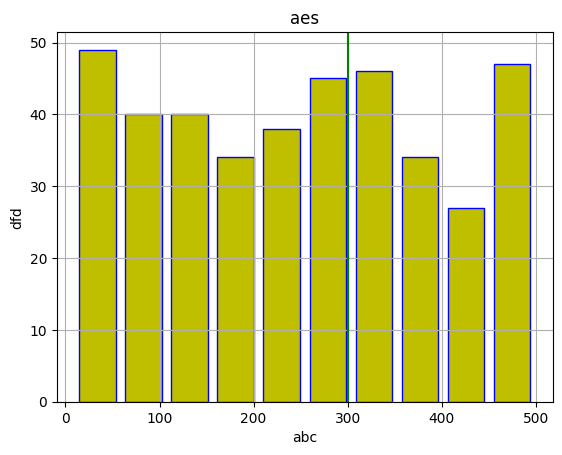

In [131]:
plt.hist(x , color = 'y' , edgecolor = 'b' , rwidth = 0.8 )
z = [100,200,300,400,500]
plt.axvline(300 , color = 'g' , label = 'green')
plt.xlabel('abc')
plt.ylabel('dfd')
plt.title('aes')
#plt.legend()
plt.grid()
plt.show()

##**lets practice stem plot**

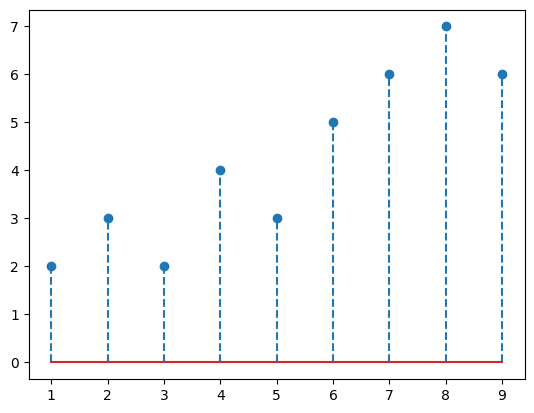

In [134]:
x= [1,2,3,4,5,6,7,8,9]
y= [2,3,2,4,3,5,6,7,6]
plt.stem(x,y , linefmt="--")

plt.show()

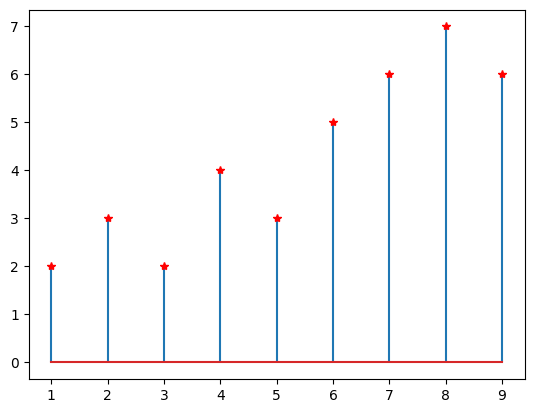

In [137]:
plt.stem(x,y , markerfmt = 'r*')

plt.show()

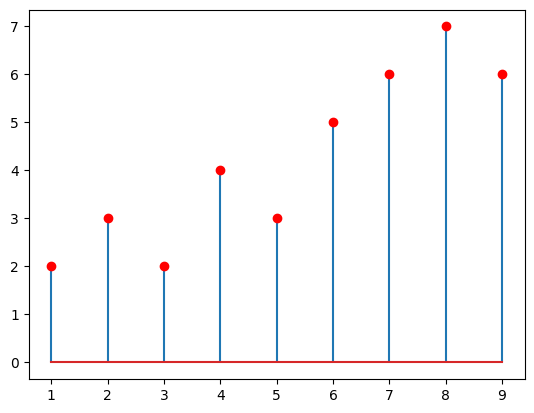

In [138]:
plt.stem(x,y , markerfmt = 'ro')

plt.show()

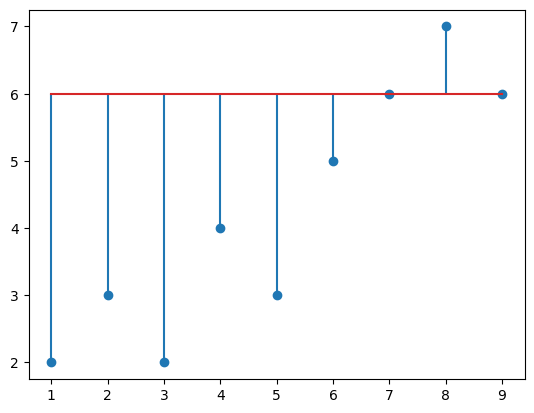

In [139]:
plt.stem(x,y , bottom = 6)

plt.show()

TypeError: ignored

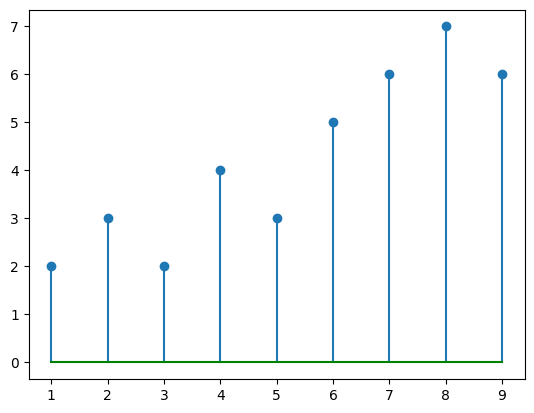

In [141]:
plt.stem(x,y , basefmt = 'g' , label = 'abc')

plt.legend()

plt.show()

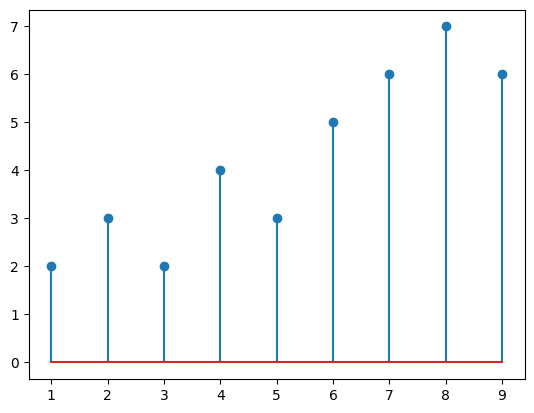

In [142]:
plt.stem(x,y ,use_line_collection = False)

plt.show()

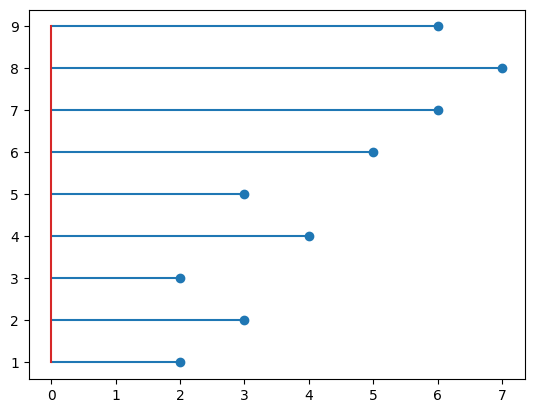

In [143]:
plt.stem(x,y , orientation = 'horizontal')

plt.show()